Topics for the Day
- Sentiment analysis using VADER package
- Topic Modelling (Clustering) 
- Word2vec (classification, word embeddings)

# VADER 

- Variance Aware Dictionary & Sentiment Reasoner 

In [2]:
import pandas as pd #It is rule based 
import numpy as np 
import nltk 

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores('i love india') #If love is capital it has more polarity, if boosting words very, great intensity increases

#percentage of negative score is 0, nuetral, positive, compound score -1 to 1, greater than 0 +ve, vice-versa. 
#we generally check compound

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [6]:
sentiment.polarity_scores('i love india i hate apple')

{'neg': 0.374, 'neu': 0.202, 'pos': 0.424, 'compound': 0.128}

In [7]:
import math 
score = 3.2 #Sentence Polrity 
alpha = 15
score / math.sqrt((score * score) + alpha)

0.6369499429264264

In [8]:
sentiment.polarity_scores('i love india i hate apple!!!')

{'neg': 0.343, 'neu': 0.186, 'pos': 0.471, 'compound': 0.3348}

In [9]:
sentiment.polarity_scores('i very Love india i hate apple!!!') #Boosting words 

{'neg': 0.321, 'neu': 0.243, 'pos': 0.435, 'compound': 0.3411}

In [10]:
sentiment.polarity_scores('i very Love india i hate apple :)')

{'neg': 0.274, 'neu': 0.208, 'pos': 0.518, 'compound': 0.5468}

# IMDB DataSet

In [11]:
imdb = pd.read_csv('imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [12]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(review):
    compound = sentiment.polarity_scores(review)['compound']
    return 0 if compound <0 else 1 
imdb['vader'] = imdb['review'].apply(get_sentiment)

In [13]:
imdb['vader']

0      0
1      0
2      0
3      1
4      1
5      0
6      0
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
718    1
719    1
720    1
721    0
722    0
723    1
724    1
725    0
726    1
727    1
728    1
729    1
730    1
731    1
732    1
733    1
734    1
735    1
736    0
737    1
738    1
739    1
740    1
741    1
742    1
743    0
744    0
745    0
746    0
747    0
Name: vader, Length: 748, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(imdb['sentiment'], imdb['vader'])

0.7767379679144385

# Predicting sentiment for Hotstar

In [17]:
hotstar = pd.read_csv('hotstar.allreviews_Sentiments.csv')

hotstar.head() #Reviews is the actual reviews, and Sentiment_Manaul is manually did

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


###Exercise
- Apply vader package sentiment analyzer to predict sentiment for each review
- From the compound score return the following labels 
- compound > 0.5, return positive 
- compund < -0.5, return negative 
- else return Neutral 

- Calculate the accuracy of the vader package sentiment analyzer using 
Sentiment_Manaul column

In [18]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(review):
    compound = sentiment.polarity_scores(review)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < - 0.05:
        return 'Negative'
    else:
        return 'Neutral' 
    
hotstar['vader'] = hotstar['Reviews'].apply(get_sentiment)

In [19]:
hotstar['vader']

0        Neutral
1       Negative
2       Negative
3       Positive
4       Positive
5       Positive
6       Positive
7        Neutral
8        Neutral
9       Positive
10      Positive
11      Positive
12      Negative
13      Positive
14      Positive
15      Negative
16      Negative
17      Positive
18      Positive
19       Neutral
20      Negative
21       Neutral
22      Positive
23       Neutral
24       Neutral
25      Positive
26      Positive
27      Positive
28      Positive
29      Negative
          ...   
5023    Positive
5024     Neutral
5025    Positive
5026    Positive
5027     Neutral
5028    Positive
5029    Negative
5030    Negative
5031    Negative
5032    Negative
5033    Positive
5034    Positive
5035    Positive
5036    Positive
5037    Negative
5038    Negative
5039    Positive
5040    Positive
5041    Positive
5042    Negative
5043    Positive
5044    Positive
5045    Positive
5046    Negative
5047    Positive
5048    Positive
5049    Negative
5050    Positi

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(hotstar['Sentiment_Manual'], hotstar['vader'])

0.5503661191371463

# Trending of customer's sentiment

In [31]:
hotstar['Created_Date'].unique()
hotstar['date'] = pd.to_datetime(hotstar['Created_Date'])
hotstar['date'].min(), hotstar['date'].max()

(Timestamp('2017-08-04 00:00:00'), Timestamp('2017-08-13 00:00:00'))

In [32]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(review):
    compound = sentiment.polarity_scores(review)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < - 0.05:
        return 'Negative'
    else:
        return 'Neutral' 
    
hotstar['vader'] = hotstar['Reviews'].apply(get_sentiment)
#hotstar['vader'].value_counts

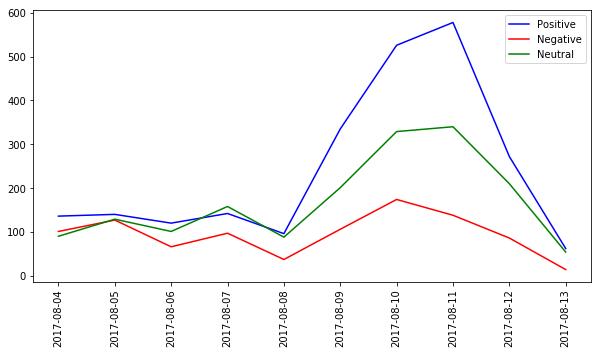

In [39]:
hotstar['date'] = pd.to_datetime(hotstar['Created_Date'])
positive_rows = hotstar[hotstar['vader']=='Positive']
negative_rows = hotstar[hotstar['vader']=='Negative']
neutral_rows = hotstar[hotstar['vader']=='Neutral']

positive_counts = positive_rows.groupby('date')['vader'].count()
negative_counts = negative_rows.groupby('date')['vader'].count()
neutral_counts = neutral_rows.groupby('date')['vader'].count()
#print(negative_counts)

%matplotlib inline 
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.plot(positive_counts,color='blue')
plt.plot(negative_counts,color='red')
plt.plot(neutral_counts,color='green')
plt.xticks(rotation='vertical')
plt.legend(['Positive','Negative','Neutral'])
plt.show()

# amazon_reviews_big (Topic Modelling) 

When we don't have labels - Need to see the topics

In [4]:
amazon = pd.read_csv('amazon_reviews_big.csv')

In [5]:
amazon.head()

,asin,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000HDJXNA,1,What I recieved is not what is pictured here O...,"12 26, 2012",A29YXBFTD7QUP3,HHA,Buyer be ware,1.356480e+09
1,B006KKS7XQ,5,Excellent unit and a pretty simple install usi...,"09 20, 2013",A3IMTXFYD7CGDN,"Peter W. George ""soyflakeman""",high quality without high price,1.379635e+09
2,B002NP8XJ0,5,"I'm enjoying this keyboard, I'm getting anothe...","08 31, 2010",AXNOW20FQKHVW,B. Hayashi,Superb keyboard + solution for slow wake up an...,1.283213e+09
3,B000EITTLE,4,"Overall, this is a fantastic camera that I'm e...","02 3, 2008",A10KCAK279LO0W,"mmcwatters ""macdadi80""",One qualm: not great in low light,1.201997e+09
4,B006CRXK4S,5,These work very well with mySamsung PN64D7000 ...,"01 28, 2012",A19XXLMZXR764J,S. Garfinkle,"Work great, fit well",1.327709e+09


In [6]:
amazon.shape

(100000, 8)

In [7]:
docs = amazon['reviewText']
docs.isnull().sum()

66

In [44]:
!pip install gensim

  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\aujas\AppData\Local\pip\Cache\wheels\f7\a6\ff\9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Running setup.py bdist_wheel for bz2file: started
  Running setup.py bdist_wheel for bz2file: finished with status 'done'
  Stored in directory: C:\Users\aujas\AppData\Local\pip\Cache\wheels\81\75\d6\e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import gensim

In [9]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')

In [10]:
docs.head()

0    what i recieved is not what is pictured here o...
1    excellent unit and a pretty simple install usi...
2    im enjoying this keyboard im getting another o...
3    overall this is a fantastic camera that im ext...
4    these work very well with mysamsung pnd inch p...
Name: reviewText, dtype: object

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['','use','will','one','good']) #We add these words later on after seeing always, intially it will be empty
stemmer = nltk.stem.PorterStemmer()

docs_clean = []
for doc in docs:
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean = [word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [12]:
docs_clean[1]

['excel',
 'unit',
 'pretti',
 'simpl',
 'instal',
 'wire',
 'adapt',
 'remov',
 'tool',
 'purchas',
 'kenwood',
 'qualiti',
 'evid',
 'look',
 'sound',
 'today',
 'bode',
 'well',
 'futur',
 'get',
 'extra',
 'stuff',
 'realli',
 'simpl',
 'installjust',
 'sure',
 'frame',
 'correctli',
 'sharpi',
 'mark',
 'top',
 'front',
 'slide',
 'radio',
 'bend',
 'tab',
 'fit',
 'snugli',
 'dash',
 'went',
 'wife',
 'miata',
 'ill',
 'like',
 'anoth',
 'mine',
 'even',
 'simpler',
 'next',
 'time',
 'also',
 'report',
 'cd',
 'player',
 'pretti',
 'skipfre',
 'isnt',
 'easi',
 'sport',
 'car']

In [13]:
dictionary = gensim.corpora.Dictionary(docs_clean)

In [18]:
(list(dictionary.values()))

['advert',
 'amazoncom',
 'anyth',
 'attempt',
 'back',
 'bait',
 'buy',
 'cabl',
 'cheap',
 'claim',
 'contact',
 'els',
 'enough',
 'find',
 'flimsi',
 'full',
 'give',
 'gold',
 'grade',
 'high',
 'im',
 'item',
 'job',
 'kareoke',
 'know',
 'list',
 'look',
 'mistak',
 'need',
 'order',
 'pictur',
 'plate',
 'product',
 'qualiti',
 'reciev',
 'refund',
 'run',
 'seller',
 'sender',
 'sent',
 'still',
 'surpris',
 'switch',
 'thin',
 'thing',
 'told',
 'tv',
 'vidio',
 'wife',
 'woth',
 'would',
 'adapt',
 'also',
 'anoth',
 'bend',
 'bode',
 'car',
 'cd',
 'correctli',
 'dash',
 'easi',
 'even',
 'evid',
 'excel',
 'extra',
 'fit',
 'frame',
 'front',
 'futur',
 'get',
 'ill',
 'instal',
 'installjust',
 'isnt',
 'kenwood',
 'like',
 'mark',
 'miata',
 'mine',
 'next',
 'player',
 'pretti',
 'purchas',
 'radio',
 'realli',
 'remov',
 'report',
 'sharpi',
 'simpl',
 'simpler',
 'skipfre',
 'slide',
 'snugli',
 'sound',
 'sport',
 'stuff',
 'sure',
 'tab',
 'time',
 'today',
 'tool',

In [118]:
dictionary.token2id['tablet'] #It will show at which id tablet is there 

1113

In [119]:
list(dictionary.values())

['advert',
 'amazoncom',
 'anyth',
 'attempt',
 'back',
 'bait',
 'buy',
 'cabl',
 'cheap',
 'claim',
 'contact',
 'els',
 'enough',
 'find',
 'flimsi',
 'full',
 'give',
 'gold',
 'grade',
 'high',
 'im',
 'item',
 'job',
 'kareoke',
 'know',
 'list',
 'look',
 'mistak',
 'need',
 'order',
 'pictur',
 'plate',
 'product',
 'qualiti',
 'reciev',
 'refund',
 'run',
 'seller',
 'sender',
 'sent',
 'still',
 'surpris',
 'switch',
 'thin',
 'thing',
 'told',
 'tv',
 'vidio',
 'wife',
 'woth',
 'would',
 'adapt',
 'also',
 'anoth',
 'bend',
 'bode',
 'car',
 'cd',
 'correctli',
 'dash',
 'easi',
 'even',
 'evid',
 'excel',
 'extra',
 'fit',
 'frame',
 'front',
 'futur',
 'get',
 'ill',
 'instal',
 'installjust',
 'isnt',
 'kenwood',
 'like',
 'mark',
 'miata',
 'mine',
 'next',
 'player',
 'pretti',
 'purchas',
 'radio',
 'realli',
 'remov',
 'report',
 'sharpi',
 'simpl',
 'simpler',
 'skipfre',
 'slide',
 'snugli',
 'sound',
 'sport',
 'stuff',
 'sure',
 'tab',
 'time',
 'today',
 'tool',

In [19]:
list(dictionary.keys())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [20]:
list(zip(dictionary.keys(),dictionary.values()))

[(0, 'advert'),
 (1, 'amazoncom'),
 (2, 'anyth'),
 (3, 'attempt'),
 (4, 'back'),
 (5, 'bait'),
 (6, 'buy'),
 (7, 'cabl'),
 (8, 'cheap'),
 (9, 'claim'),
 (10, 'contact'),
 (11, 'els'),
 (12, 'enough'),
 (13, 'find'),
 (14, 'flimsi'),
 (15, 'full'),
 (16, 'give'),
 (17, 'gold'),
 (18, 'grade'),
 (19, 'high'),
 (20, 'im'),
 (21, 'item'),
 (22, 'job'),
 (23, 'kareoke'),
 (24, 'know'),
 (25, 'list'),
 (26, 'look'),
 (27, 'mistak'),
 (28, 'need'),
 (29, 'order'),
 (30, 'pictur'),
 (31, 'plate'),
 (32, 'product'),
 (33, 'qualiti'),
 (34, 'reciev'),
 (35, 'refund'),
 (36, 'run'),
 (37, 'seller'),
 (38, 'sender'),
 (39, 'sent'),
 (40, 'still'),
 (41, 'surpris'),
 (42, 'switch'),
 (43, 'thin'),
 (44, 'thing'),
 (45, 'told'),
 (46, 'tv'),
 (47, 'vidio'),
 (48, 'wife'),
 (49, 'woth'),
 (50, 'would'),
 (51, 'adapt'),
 (52, 'also'),
 (53, 'anoth'),
 (54, 'bend'),
 (55, 'bode'),
 (56, 'car'),
 (57, 'cd'),
 (58, 'correctli'),
 (59, 'dash'),
 (60, 'easi'),
 (61, 'even'),
 (62, 'evid'),
 (63, 'excel'),


In [ ]:
dictionary.token2id['advert'] #check to which id is allocated

### Bag of words at doc level not corpus level

In [21]:
docs_bow = []
for doc in docs_clean:
    bow = dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [22]:
dictionary.doc2bow(docs_clean[0]) #for each word what is id and how many times it repeating, in first doc

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 5),
 (8, 1),
 (9, 1),
 (10, 3),
 (11, 2),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 2),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 2),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 2),
 (35, 2),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1)]

In [23]:
docs_bow #list of lists for 1st, 2nd, and so on....document level bag of words, 

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 5),
  (8, 1),
  (9, 1),
  (10, 3),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1)],
 [(26, 1),
  (33, 1),
  (48, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 2

# LDA Modelling 

In [167]:
lda_model = gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=4,random_state=100,iterations=500) 

In [186]:
coher_model = CoherenceModel(lda_model,
                                corpus=docs_bow,
                                coherence='u_mass'
                                )

In [187]:
coher_model.get_coherence_per_topic()

[-12.393743389531519,
 -12.2849272056069,
 -12.030527741972582,
 -8.939005782619217,
 -10.437623364694687,
 -7.227006386678596,
 -11.621814653412203,
 -9.030639937388663,
 -12.715788243468516,
 -12.126461380600771,
 -6.136686058914547,
 -9.408919402394893,
 -8.312438282185473,
 -9.978064025125043,
 -10.352127202568163,
 -9.42975898994595,
 -9.556266838374334,
 -9.464456679673924,
 -8.421322050027717]

In [188]:
coher_model.get_coherence()

-9.993030400799144

In [127]:
lda_modelMulticore = gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=4) 

while printing we pass the dictionary we want to see the words 

In [128]:
%timeit lda_model

53.1 ns ± 7.23 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [129]:
%timeit lda_modelMulticore

49.3 ns ± 5.54 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# Chohrence Model 

In [183]:
from gensim.models.coherencemodel import CoherenceModel
c_scores = []
for i in range(4,20):
    lda_model = gensim.models.LdaModel(docs_bow,
                                      id2word=dictionary,
                                      num_topics=i,
                                      random_state=100)
    coher_model = CoherenceModel(lda_model,
                                corpus=docs_bow,
                                coherence='u_mass'
                                )
    
    score = coher_model.get_coherence()
    c_scores.append(score)

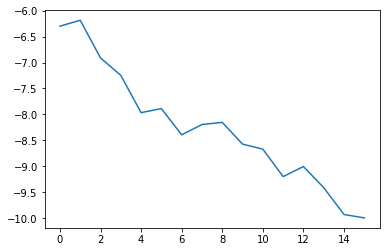

In [185]:
plt.plot(c_scores) #Give the optimal number of model then, by elbow method

### Document to Topic Relationship

In [168]:
lda_model.get_document_topics(docs_bow[0]) #Doc1 is from document 2, high percentage 

[(0, 0.06258446), (1, 0.06417751), (2, 0.062520556), (3, 0.81071746)]

In [169]:
lda_model.get_document_topics(docs_bow[1]) #Mix of topic 0, and mix of topic 2 and percentages are given

[(0, 0.039046314), (1, 0.8829727), (2, 0.038995326), (3, 0.038985677)]

It does multitagging, If only 2 is considered as highest percentage it is unitagging

In [170]:
df = pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topic','probs'])

In [171]:
df.sort_values(by='probs')

,topic,probs
3,3,0.038986
2,2,0.038995
0,0,0.039046
1,1,0.882973


In [172]:
df.sort_values(by='probs').iloc[-1]

topic    1.000000
probs    0.882973
Name: 1, dtype: float64

In [173]:
df.sort_values(by='probs').iloc[-1]['topic']

1.0

In [174]:
topics = []
for doc in docs_bow:
    df = pd.DataFrame(lda_model.get_document_topics(doc),columns=['topic','probs'])
    topic = df.sort_values(by='probs').iloc[-1]['topic']
    topics.append(topic)
amazon['topics'] = topics

In [175]:
amazon['topics'].value_counts()

3.0    28654
2.0    25965
1.0    25373
0.0    20008
Name: topics, dtype: int64

### Topic to Term's Relationship

In [138]:
lda_model.print_topics() #additional: es will remove like in devic similarly 

[(0,
  '0.013*"camera" + 0.011*"tv" + 0.008*"get" + 0.008*"pictur" + 0.008*"work" + 0.007*"video" + 0.007*"set" + 0.006*"great" + 0.006*"time" + 0.006*"like"'),
 (1,
  '0.016*"work" + 0.016*"drive" + 0.011*"usb" + 0.010*"card" + 0.009*"comput" + 0.009*"connect" + 0.008*"cabl" + 0.007*"power" + 0.007*"instal" + 0.007*"devic"'),
 (2,
  '0.013*"work" + 0.011*"case" + 0.011*"like" + 0.010*"great" + 0.009*"batteri" + 0.009*"sound" + 0.008*"well" + 0.007*"would" + 0.007*"get" + 0.007*"charg"'),
 (3,
  '0.013*"len" + 0.012*"speaker" + 0.009*"camera" + 0.007*"mount" + 0.007*"sound" + 0.006*"screen" + 0.006*"get" + 0.006*"like" + 0.006*"mm" + 0.005*"bag"')]

# Exercise

- Apply topic modelling to cluster news based on their headlines. Using abcnews.csv file randomly select 100000 rows

In [139]:
abcnews = pd.read_csv('abcnews1.csv').sample(100000)

In [142]:
abcnews.head()

,publish_date,headline_text
1070680,20170326,who can ask a question on q and a
362015,20080207,cannonvale man to front court accused of charity
543527,20100611,airport and jetstar at odds over flight cuts
743996,20121126,ord stage three
30630,20030716,human rights watch blasts security for iraqi w...


In [141]:
abcnews.shape

(100000, 2)

In [143]:
docs = abcnews['headline_text'].fillna('').str.lower().str.replace('[^a-z ]','')

In [144]:
docs.head()

1070680                    who can ask a question on q and a
362015      cannonvale man to front court accused of charity
543527          airport and jetstar at odds over flight cuts
743996                                       ord stage three
30630      human rights watch blasts security for iraqi w...
Name: headline_text, dtype: object

In [156]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["",'us',]) #add to these after you get in the end the words, 
stemmer = nltk.stem.PorterStemmer()

docs_clean = []
for doc in docs:
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean = [word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [157]:
dictionary = gensim.corpora.Dictionary(docs_clean)

In [158]:
list(dictionary.values())

['ask',
 'q',
 'question',
 'accus',
 'cannonval',
 'chariti',
 'court',
 'front',
 'man',
 'airport',
 'cut',
 'flight',
 'jetstar',
 'odd',
 'ord',
 'stage',
 'three',
 'blast',
 'human',
 'iraqi',
 'right',
 'secur',
 'watch',
 'women',
 'fear',
 'limit',
 'pressur',
 'put',
 'size',
 'snapper',
 'drink',
 'drive',
 'nab',
 'one',
 'oper',
 'ntch',
 'podcast',
 'act',
 'centr',
 'childcar',
 'shake',
 'acpet',
 'caus',
 'colleg',
 'evocca',
 'issu',
 'notic',
 'lucki',
 'near',
 'ordeal',
 'outback',
 'strand',
 'surviv',
 'winton',
 'woman',
 'child',
 'guilti',
 'mum',
 'newitt',
 'phoenix',
 'plead',
 'sarah',
 'threat',
 'appeal',
 'gold',
 'hear',
 'mine',
 'nativ',
 'titl',
 'dog',
 'japan',
 'pm',
 'visit',
 'whale',
 'bridg',
 'gil',
 'beechworth',
 'east',
 'escap',
 'north',
 'prison',
 'victoria',
 'countri',
 'hour',
 'murrayvil',
 'road',
 'vic',
 'case',
 'johnston',
 'proceed',
 'told',
 'accid',
 'boy',
 'farm',
 'stabl',
 'malcolm',
 'paulin',
 'pay',
 'robert',
 't

In [159]:
list(dictionary.keys())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [160]:
list(zip(dictionary.keys(),dictionary.values()))

[(0, 'ask'),
 (1, 'q'),
 (2, 'question'),
 (3, 'accus'),
 (4, 'cannonval'),
 (5, 'chariti'),
 (6, 'court'),
 (7, 'front'),
 (8, 'man'),
 (9, 'airport'),
 (10, 'cut'),
 (11, 'flight'),
 (12, 'jetstar'),
 (13, 'odd'),
 (14, 'ord'),
 (15, 'stage'),
 (16, 'three'),
 (17, 'blast'),
 (18, 'human'),
 (19, 'iraqi'),
 (20, 'right'),
 (21, 'secur'),
 (22, 'watch'),
 (23, 'women'),
 (24, 'fear'),
 (25, 'limit'),
 (26, 'pressur'),
 (27, 'put'),
 (28, 'size'),
 (29, 'snapper'),
 (30, 'drink'),
 (31, 'drive'),
 (32, 'nab'),
 (33, 'one'),
 (34, 'oper'),
 (35, 'ntch'),
 (36, 'podcast'),
 (37, 'act'),
 (38, 'centr'),
 (39, 'childcar'),
 (40, 'shake'),
 (41, 'acpet'),
 (42, 'caus'),
 (43, 'colleg'),
 (44, 'evocca'),
 (45, 'issu'),
 (46, 'notic'),
 (47, 'lucki'),
 (48, 'near'),
 (49, 'ordeal'),
 (50, 'outback'),
 (51, 'strand'),
 (52, 'surviv'),
 (53, 'winton'),
 (54, 'woman'),
 (55, 'child'),
 (56, 'guilti'),
 (57, 'mum'),
 (58, 'newitt'),
 (59, 'phoenix'),
 (60, 'plead'),
 (61, 'sarah'),
 (62, 'threat'

In [161]:
docs_bow = []
for doc in docs_clean:
    bow = dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [162]:
lda_model = gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=4,random_state=100) 

# Coherence Model

In [177]:
from gensim.models.coherencemodel import CoherenceModel

In [178]:
coher_model = CoherenceModel(lda_model,corpus=docs_bow,coherence='u_mass')

In [179]:
coher_model.get_coherence()

-6.523043376281551

In [163]:
lda_model.get_document_topics(docs_bow[0])

[(0, 0.062875025), (1, 0.06418384), (2, 0.06252053), (3, 0.8104206)]

# No. of Clusters with Topic 

In [164]:
topics = []
for doc in docs_bow:
    df = pd.DataFrame(lda_model.get_document_topics(doc),columns=['topic','probs'])
    topic = df.sort_values(by='probs').iloc[-1]['topic']
    topics.append(topic)
abcnews['topics'] = topics

In [180]:
abcnews['topics'].value_counts() #words related to particular topic 

3.0    28498
1.0    25517
2.0    25451
0.0    20534
Name: topics, dtype: int64

In [166]:
lda_model.print_topics() #Top 10 unique words of each topic in all the docs 

[(0,
  '0.013*"interview" + 0.007*"win" + 0.007*"price" + 0.007*"rural" + 0.006*"lead" + 0.006*"deal" + 0.005*"australia" + 0.005*"new" + 0.005*"australian" + 0.004*"take"'),
 (1,
  '0.023*"polic" + 0.019*"man" + 0.012*"charg" + 0.011*"court" + 0.008*"qld" + 0.007*"attack" + 0.007*"death" + 0.007*"murder" + 0.006*"jail" + 0.006*"face"'),
 (2,
  '0.009*"fund" + 0.007*"market" + 0.006*"day" + 0.006*"boost" + 0.006*"new" + 0.005*"found" + 0.005*"road" + 0.004*"china" + 0.004*"year" + 0.004*"mayor"'),
 (3,
  '0.014*"plan" + 0.011*"council" + 0.010*"call" + 0.008*"say" + 0.007*"govt" + 0.007*"water" + 0.007*"new" + 0.006*"cut" + 0.006*"back" + 0.006*"chang"')]